# **Module 5: Data Wrangling and Preprocessing**

# Lab Practice 5.1

**Topic:** Data Preprocessing for a Healthcare Study

**Problem Statement:** A healthcare provider needs to clean and preprocess patient data for an upcoming study. Handle missing values, identify and treat outliers, and apply necessary transformations to ensure data quality.


**Steps to be followed:**

1.	Create Sample Dataset:

            a. We create a sample dataset with 500 patients, including additional attributes such as height, weight, blood_pressure, cholesterol, glucose, smoking_status, physical_activity, and disease_history.

2.	Calculate BMI:

            a. Calculate the Body Mass Index (BMI) using the formula: weight (kg) / (height (m) ^ 2).

3.	Introduce Missing Values:

            a. Randomly introduce missing values in cholesterol, glucose, and physical_activity columns.

4.	Handle Missing Values:

            a. Fill missing values in cholesterol and glucose with the mean.
            b. Fill missing values in physical_activity with the median.

5.	Identify and Treat Outliers:

            a. Use the Z-score method to identify outliers in cholesterol, glucose, and bmi.
            b. Cap outliers by replacing values beyond 3 standard deviations from the mean with the respective upper and lower limits.

6.	Apply Necessary Transformations:

            a. Convert gender and blood_pressure to categorical variables.
7.	Save Cleaned Data:

            a. Save the cleaned and preprocessed data to a CSV file for further analysis.
8.	Visualizations:

            a. Plot the distribution of ages and BMI.
            b. Create a boxplot of cholesterol levels by smoking status.


**Step 1: Import libraries and Create Sample Dataset**

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
np.random.seed(42)

# Create sample data
patient_data = {
    'patient_id': range(1, 501),
    'age': np.random.randint(18, 90, 500),
    'gender': np.random.choice(['male', 'female'], 500),
    'height': np.random.uniform(140, 200, 500),
    'weight': np.random.uniform(45, 150, 500),
    'blood_pressure': np.random.choice(['normal', 'elevated', 'hypertension_stage_1', 'hypertension_stage_2'], 500),
    'cholesterol': np.random.uniform(100, 300, 500),
    'glucose': np.random.uniform(70, 200, 500),
    'smoking_status': np.random.choice(['never', 'former', 'current'], 500),
    'physical_activity': np.random.randint(0, 300, 500),
    'disease_history': np.random.choice([0, 1], 500)
}

# Convert to DataFrame
df = pd.DataFrame(patient_data)



**step 2:Calculate BMI**

In [3]:

df['bmi'] = df['weight'] / ((df['height'] / 100) ** 2)

# Introduce some missing values randomly
df.loc[np.random.choice(df.index, 20, replace=False), 'cholesterol'] = np.nan
df.loc[np.random.choice(df.index, 20, replace=False), 'glucose'] = np.nan
df.loc[np.random.choice(df.index, 20, replace=False), 'physical_activity'] = np.nan

**Step 3: Load Data into DataFrame**

In [4]:
print(df.head())

   patient_id  age  gender      height      weight        blood_pressure  \
0           1   69  female  149.261763  123.713442  hypertension_stage_2   
1           2   32  female  168.868406   58.659055                normal   
2           3   89    male  171.955366  124.617636  hypertension_stage_2   
3           4   78    male  143.109412   47.581626  hypertension_stage_2   
4           5   38    male  160.196257   47.322973  hypertension_stage_2   

   cholesterol     glucose smoking_status  physical_activity  disease_history  \
0   165.638551   77.494186          never               28.0                1   
1          NaN  114.518237          never              116.0                1   
2   117.720086  105.132200        current              281.0                0   
3   144.122391  195.634260         former              143.0                0   
4   219.645059  142.502147        current                NaN                1   

         bmi  
0  55.528988  
1  20.570188  
2  42.14519

**Step 4: Handle Missing Values**

In [5]:
# Fill missing values in 'cholesterol' and 'glucose' with mean
df['cholesterol'].fillna(df['cholesterol'].mean(), inplace=True)
df['glucose'].fillna(df['glucose'].mean(), inplace=True)

# Fill missing values in 'physical_activity' with median
df['physical_activity'].fillna(df['physical_activity'].median(), inplace=True)

/tmp/ipykernel_271143/3481425628.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['cholesterol'].fillna(df['cholesterol'].mean(), inplace=True)
/tmp/ipykernel_271143/3481425628.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, 

**Step 5: Identify and Treat Outliers**

In [6]:
# Z-score method to identify outliers
def identify_outliers_zscore(df, column):
    df['zscore'] = (df[column] - df[column].mean()) / df[column].std()
    outliers = df[np.abs(df['zscore']) > 3]
    return outliers

cholesterol_outliers = identify_outliers_zscore(df, 'cholesterol')
glucose_outliers = identify_outliers_zscore(df, 'glucose')
bmi_outliers = identify_outliers_zscore(df, 'bmi')

# Treat outliers by capping
def cap_outliers(df, column):
    upper_limit = df[column].mean() + 3 * df[column].std()
    lower_limit = df[column].mean() - 3 * df[column].std()
    df[column] = np.where(df[column] > upper_limit, upper_limit, df[column])
    df[column] = np.where(df[column] < lower_limit, lower_limit, df[column])
    return df

df = cap_outliers(df, 'cholesterol')
df = cap_outliers(df, 'glucose')
df = cap_outliers(df, 'bmi')

# Drop the zscore column used for identifying outliers
df.drop(columns=['zscore'], inplace=True)

**Step 6: Apply Necessary Transformations**

In [7]:
# Convert 'gender' and 'blood_pressure' to categorical variables
df['gender'] = df['gender'].astype('category')
df['blood_pressure'] = df['blood_pressure'].astype('category')

**step 7:Save cleaned data to CSV for further analysis**

In [8]:
df.to_csv('cleaned_patient_data.csv', index=False)

print("Data cleaning and preprocessing complete. Cleaned dataset saved to CSV.")
print(df.head())

Data cleaning and preprocessing complete. Cleaned dataset saved to CSV.
   patient_id  age  gender      height      weight        blood_pressure  \
0           1   69  female  149.261763  123.713442  hypertension_stage_2   
1           2   32  female  168.868406   58.659055                normal   
2           3   89    male  171.955366  124.617636  hypertension_stage_2   
3           4   78    male  143.109412   47.581626  hypertension_stage_2   
4           5   38    male  160.196257   47.322973  hypertension_stage_2   

   cholesterol     glucose smoking_status  physical_activity  disease_history  \
0   165.638551   77.494186          never               28.0                1   
1   200.100682  114.518237          never              116.0                1   
2   117.720086  105.132200        current              281.0                0   
3   144.122391  195.634260         former              143.0                0   
4   219.645059  142.502147        current              165.0      

**step 8: Display the cleaned DataFrame**

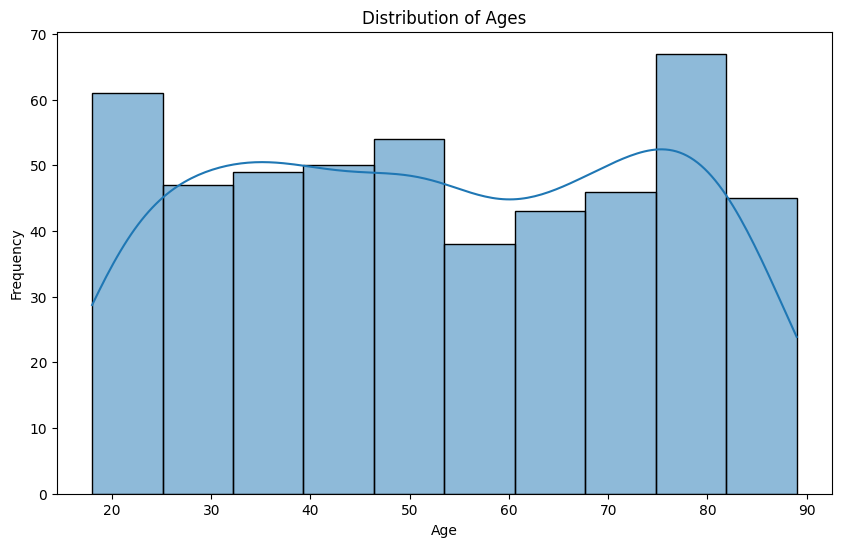

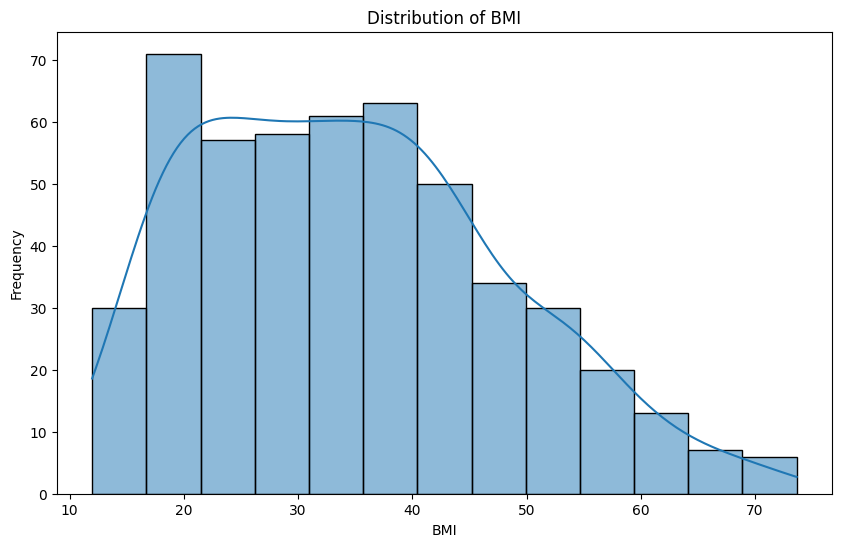

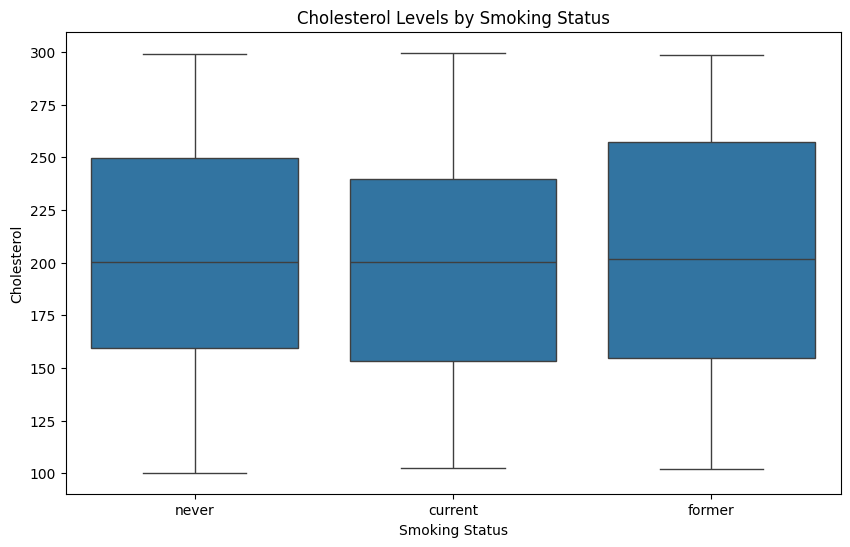

In [9]:
# Visualizations
# Distribution of ages
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], kde=True)
plt.title('Distribution of Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Distribution of BMI
plt.figure(figsize=(10, 6))
sns.histplot(df['bmi'], kde=True)
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

# Boxplot of cholesterol levels by smoking status
plt.figure(figsize=(10, 6))
sns.boxplot(x='smoking_status', y='cholesterol', data=df)
plt.title('Cholesterol Levels by Smoking Status')
plt.xlabel('Smoking Status')
plt.ylabel('Cholesterol')
plt.show()
